In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
dataset = pd.read_excel("Tank wise GL from 2018 to 2020.xlsx",sheet_name="Sheet1",usecols="B,E:G,J,K,M,N:P",header=0)

In [121]:
dataset.dropna(axis=0,inplace=True)

In [122]:
dataset.columns

Index(['Tank Cap', 'OP L15', 'RE L15', 'DE L15', 'LG L15', 'LG% L15',
       'Loss/(Gain) % L15', 'Product_Grade', 'Hot Months', 'Gain/Loss'],
      dtype='object')

In [123]:
zz = dataset[dataset["Product_Grade"]=="MS"]

In [124]:
X = zz.drop(columns=["Product_Grade","Gain/Loss","LG% L15","Loss/(Gain) % L15","LG L15"],axis=1)
y = zz["LG L15"]

In [125]:
np.corrcoef(zz["LG L15"],zz["Tank Cap"])

array([[1.        , 0.16527037],
       [0.16527037, 1.        ]])

In [126]:
np.corrcoef(zz["LG L15"],zz["OP L15"])

array([[1.        , 0.12907212],
       [0.12907212, 1.        ]])

In [127]:
np.corrcoef(zz["LG L15"],zz["RE L15"])

array([[1.        , 0.48892916],
       [0.48892916, 1.        ]])

In [128]:
np.corrcoef(zz["LG L15"],zz["DE L15"])

array([[1.        , 0.75127874],
       [0.75127874, 1.        ]])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [130]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [131]:
predictions = lm.predict(X_test)

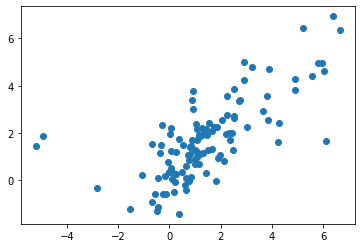

In [132]:
plt.scatter(y_test,predictions)

In [133]:
np.corrcoef(y_test,predictions)

array([[1.        , 0.71348341],
       [0.71348341, 1.        ]])

In [134]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

-0.5541594031232473


,Coefficient
Tank Cap,0.000133
OP L15,-0.000866
RE L15,0.000035
DE L15,0.002145
Hot Months,0.683505


In [135]:
from sklearn import metrics

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9813294774917166
MSE: 2.1009622957680905
RMSE: 1.4494696601750898


In [137]:
import statsmodels.api as sm

In [138]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LG L15   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     43.08
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.49e-27
Time:                        20:51:32   Log-Likelihood:                -272.29
No. Observations:                 159   AIC:                             556.6
Df Residuals:                     153   BIC:                             575.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4205      0.570     -0.738      0.4

### TRECS DATA MODELLING

In [139]:
datafr = pd.read_excel("TRECS India Plant Reports JAN 2018 TO AUG 2020.xlsx",sheet_name="AnalyzeData",header=0,usecols="B:R")

In [140]:
MS_filter = datafr["Product_Grade"].isin(["MS"])
HSD_filter = datafr["Product_Grade"].isin(["HSD"])

plant_filter = datafr["PlantID"].isin([21]) # indicating the plant to be chosen

In [141]:
datafr[MS_filter & plant_filter].columns

Index(['PlantID', 'TankCode', 'TerminalProductCode', 'TerminalProductDesc',
       'OpeningStock', 'OpeningStockTemp', 'OpeningStockDensity', 'Receipt',
       'Disposal', 'ClosingStock', 'ClosingStockTemp', 'ClosingStockDensity',
       'BookStock', 'Gain', 'MonthNo', 'YearNo', 'Product_Grade'],
      dtype='object')

In [142]:
abc = datafr[MS_filter & plant_filter].copy()

# dataframe for running the regression analysis
cde = abc[~abc['Gain'].isin([0])].copy()

# dataframe for plotting the dormancy behaviour
zero_rec = abc["Receipt"].isin([0])
zero_disp = abc["Disposal"].isin([0])
dorm = abc[zero_rec & zero_disp].copy()

In [143]:
xx=cde.drop(columns=['TankCode','TerminalProductCode', 'TerminalProductDesc','Product_Grade','ClosingStock','BookStock','Gain','OpeningStockTemp','PlantID','MonthNo','YearNo'],axis=1)
yy = cde['Gain']

In [144]:
xx = sm.add_constant(xx)
model = sm.OLS(yy,xx)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gain   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     6.447
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.59e-06
Time:                        20:51:46   Log-Likelihood:                -3359.7
No. Observations:                 444   AIC:                             6733.
Df Residuals:                     437   BIC:                             6762.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6158.5815   3

In [145]:
aa=cde.drop(columns=['TankCode','TerminalProductCode', 'TerminalProductDesc','Product_Grade','ClosingStock','BookStock','Gain','OpeningStockTemp','PlantID','MonthNo','YearNo'],axis=1)
bb = cde['Gain']

In [146]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(aa, bb, test_size=0.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(XX_train,yy_train)

LinearRegression()

In [147]:
_predictions = lm1.predict(XX_test)

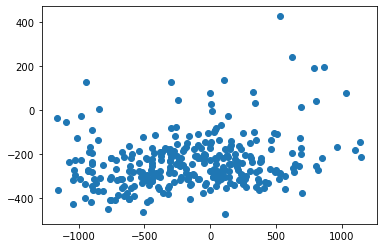

In [148]:
plt.scatter(yy_test,_predictions)

In [149]:
np.corrcoef(yy_test,_predictions)

array([[1.        , 0.25116971],
       [0.25116971, 1.        ]])

In [150]:
print(lm1.intercept_)
coeff_df1 = pd.DataFrame(lm1.coef_,aa.columns,columns=['Coefficient'])
coeff_df1

-7416.997390523691


,Coefficient
OpeningStock,-7.679527e-06
OpeningStockDensity,-5.264669e+01
Receipt,-1.421085e-14
Disposal,8.821587e-04
ClosingStockTemp,3.901838e+01
ClosingStockDensity,6.075245e+01


array([[ 1.        , -0.00493887],
       [-0.00493887,  1.        ]])

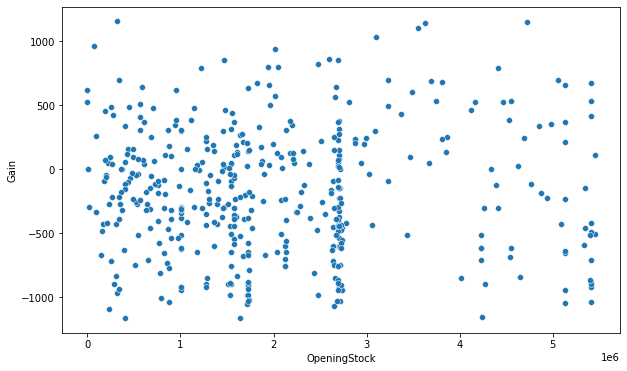

In [151]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='OpeningStock',y='Gain',data = cde)

np.corrcoef(aa['OpeningStock'],bb)

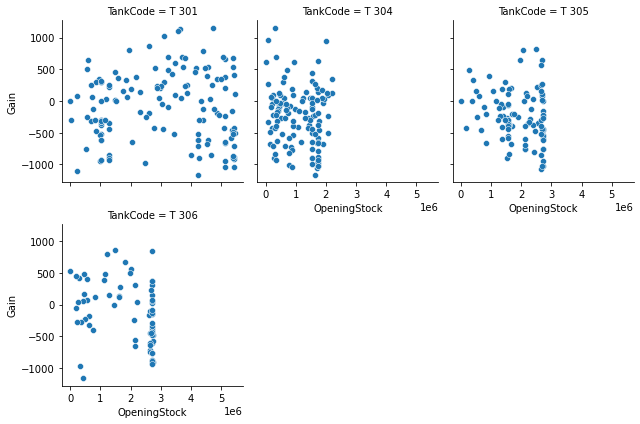

In [152]:
g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3)
g.map(sns.scatterplot, 'OpeningStock', 'Gain')

array([[1.        , 0.26222848],
       [0.26222848, 1.        ]])

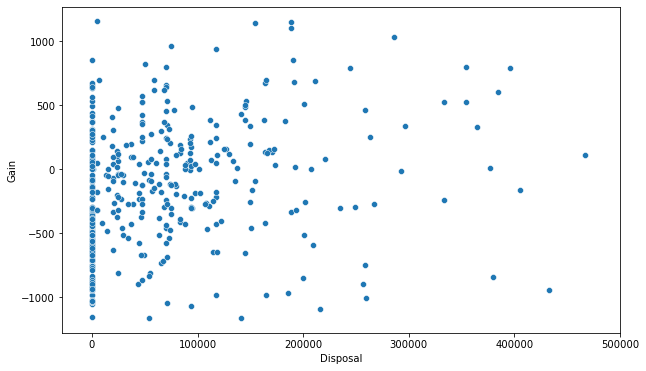

In [153]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='Disposal',y='Gain',data = cde)
ax.set_xlim(None,0.5e6)

np.corrcoef(aa['Disposal'],bb)

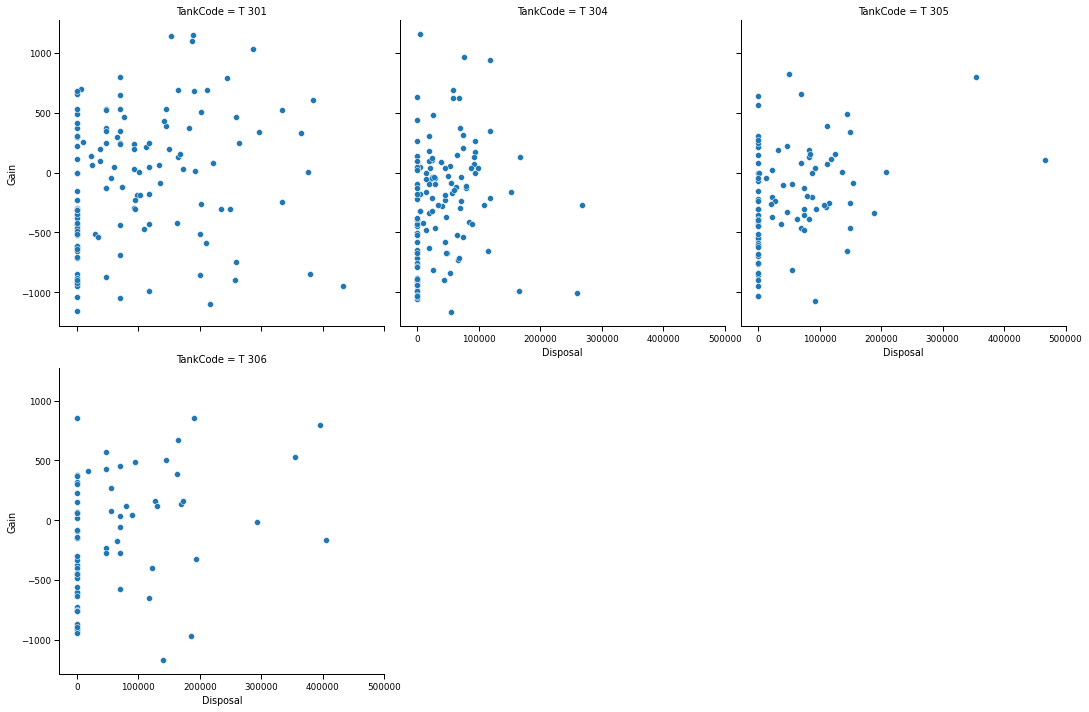

In [154]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map(sns.scatterplot, 'Disposal', 'Gain')
g.set(xlim=(None, 0.5e6))

array([[1.        , 0.10045815],
       [0.10045815, 1.        ]])

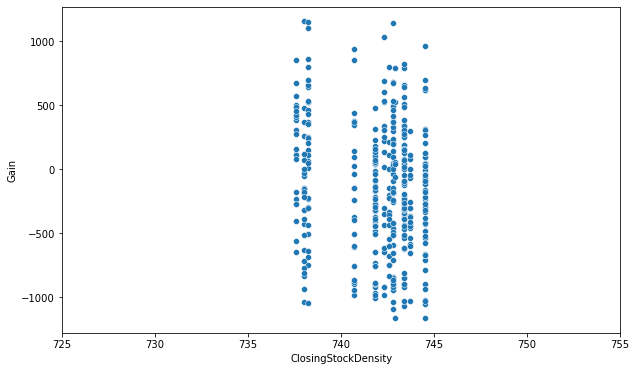

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='ClosingStockDensity',y='Gain',data = cde)
ax.set_xlim(725,755)

np.corrcoef(aa['ClosingStockDensity'],bb)

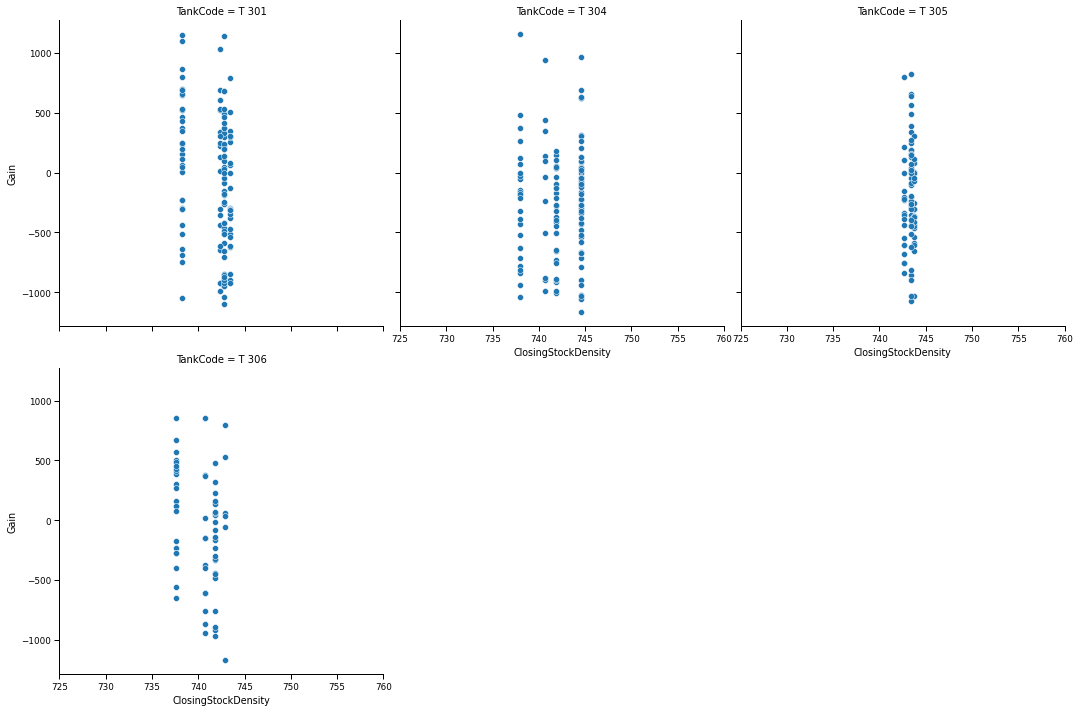

In [156]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map(sns.scatterplot, 'ClosingStockDensity', 'Gain')
g.set(xlim=(725,760))

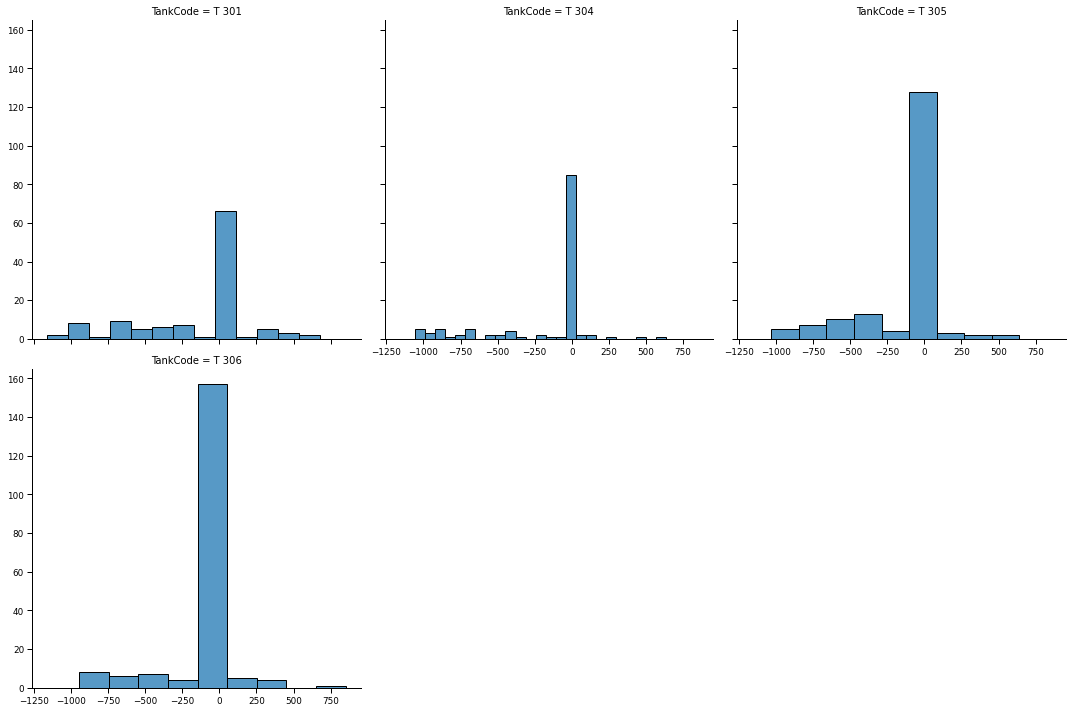

In [157]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=dorm,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map_dataframe(sns.histplot, x='Gain')

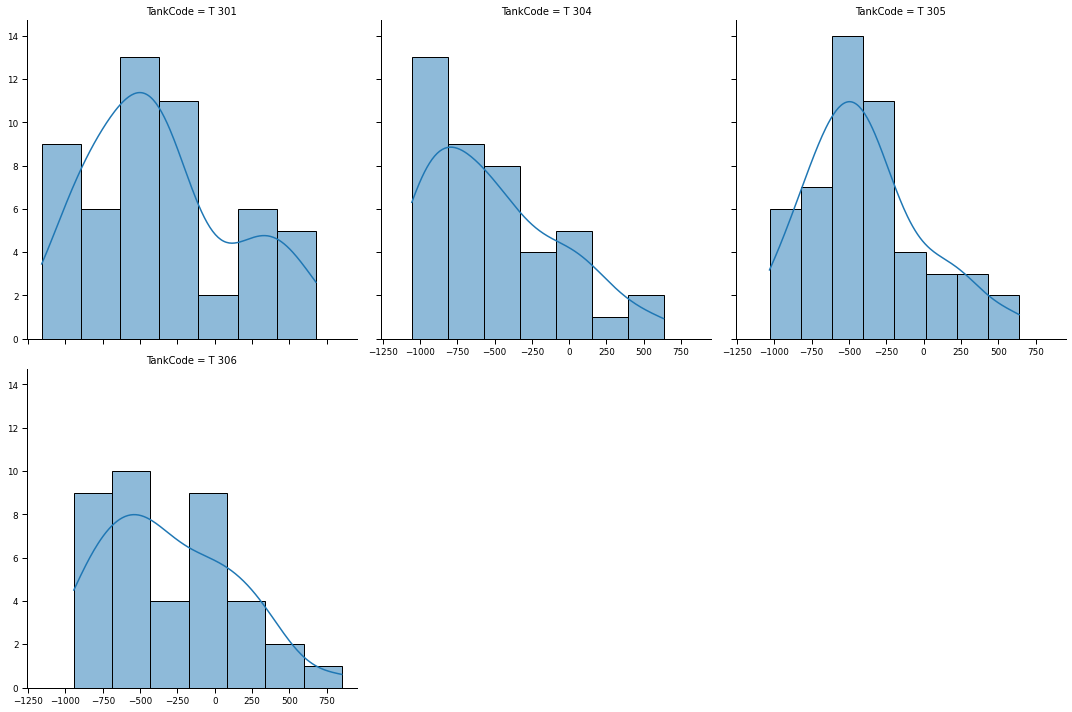

In [158]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=dorm[dorm['Gain']!=0],col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map_dataframe(sns.histplot, x='Gain',kde=True)

In [159]:
dorm[dorm['Gain']!=0]

,PlantID,TankCode,TerminalProductCode,TerminalProductDesc,OpeningStock,OpeningStockTemp,OpeningStockDensity,Receipt,Disposal,ClosingStock,ClosingStockTemp,ClosingStockDensity,BookStock,Gain,MonthNo,YearNo,Product_Grade
390,21,T 301,400004346,BF MS BSIV,1279348,31.75,742.3,0,0.0,1279569,32.00,742.3,1279348.0,221.0,6,2019,MS
401,21,T 304,400004346,BF MS BSIV,1725781,31.00,740.7,0,0.0,1724883,30.50,740.7,1725781.0,-898.0,6,2019,MS
407,21,T 305,400004346,BF MS BSIV,2711471,30.75,742.6,0,0.0,2711321,30.75,742.6,2711471.0,-150.0,6,2019,MS
412,21,T 305,400004346,BF MS BSIV,2711321,30.75,742.6,0,0.0,2710568,30.75,742.6,2711321.0,-753.0,6,2019,MS
413,21,T 305,400004346,BF MS BSIV,2710568,30.75,742.6,0,0.0,2709815,30.75,742.6,2710568.0,-753.0,6,2019,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,21,T 305,400004346,BF MS BSIV,2671265,28.75,743.4,0,0.0,2670872,28.50,743.4,2671265.0,-393.0,10,2018,MS
7679,21,T 301,400004346,BF MS BSIV,5406176,28.00,742.8,0,0.0,5405661,27.75,742.8,5406176.0,-515.0,11,2018,MS
7680,21,T 304,400004346,BF MS BSIV,1724400,28.00,744.5,0,0.0,1723732,27.75,744.5,1724400.0,-668.0,11,2018,MS
7687,21,T 304,400004346,BF MS BSIV,1718888,28.50,744.5,0,0.0,1718909,28.00,744.5,1718888.0,21.0,12,2018,MS
